In [1]:
import edward as ed
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from edward.models import Bernoulli, Beta
plt.style.use('ggplot')

%matplotlib inline

In [36]:
from edward.models import Normal,Beta,Categorical,Mixture,Multinomial,Empirical

In [4]:
from scipy.stats import distributions

# Sample parameters
nsamples = 1000
mu1_true = 0.3
mu2_true = 0.55
sig1_true = 0.08
sig2_true = 0.12
a_true = 0.4

# Samples generation
np.random.seed(3)  # for repeatability
s1 = distributions.norm.rvs(mu1_true, sig1_true, size=round(a_true*nsamples))
s2 = distributions.norm.rvs(mu2_true, sig2_true, size=round((1-a_true)*nsamples))
samples = np.hstack([s1, s2])


(array([  18.,   84.,  207.,  162.,  173.,  178.,  129.,   43.,    4.,    2.]),
 array([ 0.06128238,  0.15458364,  0.2478849 ,  0.34118617,  0.43448743,
         0.52778869,  0.62108995,  0.71439121,  0.80769247,  0.90099373,
         0.99429499]),
 <a list of 10 Patch objects>)

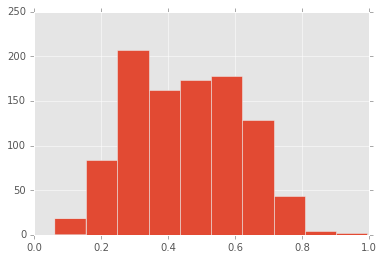

In [5]:
plt.hist(samples)

In [136]:
sigmas = Normal(0.1, 1/1000, sample_shape=2)
_sigmas = sigmas.value()
#centers = Normal([0.3, 0.7], [1/(0.1)**2, 1/(0.1)**2], sample_shape=2)
centers = Normal([0.3, 0.7], [1/(0.1)**2, 1/(0.1)**2])
_centers = centers.value()

alpha  = Beta(2.0, 3.0)
_alpha = alpha.value()
category = Categorical(probs = [_alpha, 1 - _alpha], sample_shape=nsamples)
components = [
    Normal(_centers[k], _sigmas[k],sample_shape=nsamples)
    for k in range(2)]
x = Mixture(cat=category, components=components,sample_shape=nsamples)



In [137]:
x.sample(10).eval()

array([ -78.15901184,  -78.14749146,  -78.30801392, -125.13528442,
        -77.87097931,  -78.09697723,  -77.93295288,  -77.9617157 ,
        -78.0637207 ,  -78.1440506 ], dtype=float32)

In [138]:
sigmas,centers

(<ed.RandomVariable 'Normal_290/' shape=(2,) dtype=float32>,
 <ed.RandomVariable 'Normal_293/' shape=(2,) dtype=float32>)

In [139]:
x.sample().eval()

198.57187

In [140]:
T = 10000

qsigmas = Empirical(tf.Variable(tf.ones([T,2])))
qcenters = Empirical(tf.Variable(tf.zeros([T,2])))
qalpha = Empirical(tf.Variable(tf.ones(T)*0.5))

In [141]:
gsigmas = Normal(sigmas, 0.01)
gcenters = Normal(centers, 0.01)
galpha = Normal(alpha,0.001)

In [142]:
inference = ed.MetropolisHastings({centers:qcenters,sigmas:qsigmas,alpha:qalpha},
                                  {centers:gcenters,sigmas:gsigmas,alpha:galpha},
                                  {x:samples})

In [143]:
inference.run()

10000/10000 [100%] ██████████████████████████████ Elapsed: 8s | Acceptance Rate: 0.031


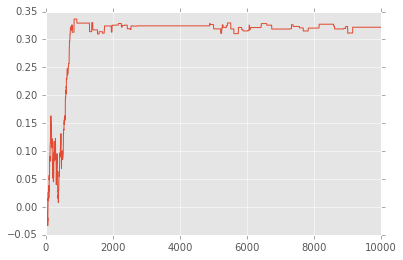

In [144]:
trace = qcenters.params.eval()
plt.plot(trace[:,0])

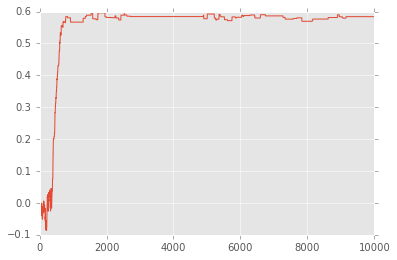

In [145]:
trace = qcenters.params.eval()
plt.plot(trace[:,1])

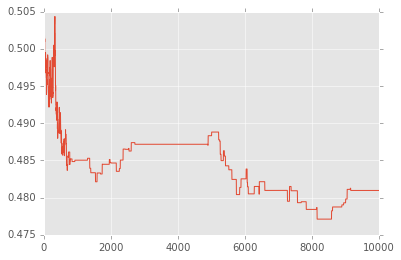

In [146]:
plt.plot(qalpha.params.eval())

In [126]:
alpha.value()

<tf.Tensor 'Beta_60/sample/Reshape:0' shape=() dtype=float32>

In [127]:
alpha

<ed.RandomVariable 'Beta_61/' shape=() dtype=float32>

In [ ]:
Categorical